<a href="https://colab.research.google.com/github/iHakawaTi/SHAI/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay

In [158]:
data = pd.read_csv('/content/adult.csv')
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [159]:
# Check for unique values in the income column
print(data['income'].nunique())

4


In [160]:
unique_values = data['income'].unique()
print(unique_values)
# we can see we have inconsistent data due to trailing periods

['<=50K' '>50K' '<=50K.' '>50K.']


In [161]:
# we replace em and correct them to get a better result
data['income'] = data['income'].replace(['<=50K.', '<=50K'], '<=50K')
data['income'] = data['income'].replace(['>50K.', '>50K'], '>50K')

In [162]:
# create the parameters
x = data.drop('income', axis=1)
y = data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)

print(f"Data size: {len(x)}\nTraining data size: {len(x_train)}\nTesting data size: {len(x_test)}")

Data size: 48842
Training data size: 39073
Testing data size: 9769


In [163]:
# preprocessing
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns

# Fit and transform on numerical features only
x_train_transformed = scaler.fit_transform(x_train[numerical_features])
x_test_transformed = scaler.transform(x_test[numerical_features])

In [164]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train_transformed, y_train)
y_hat_lr = lr.predict(x_test_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [165]:

acc = accuracy_score(y_test, y_hat_lr)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_lr, zero_division=1)
print(report)

Model accuracy was 81.81%
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      7424
        >50K       0.71      0.41      0.52      2345

    accuracy                           0.82      9769
   macro avg       0.77      0.68      0.70      9769
weighted avg       0.81      0.82      0.80      9769



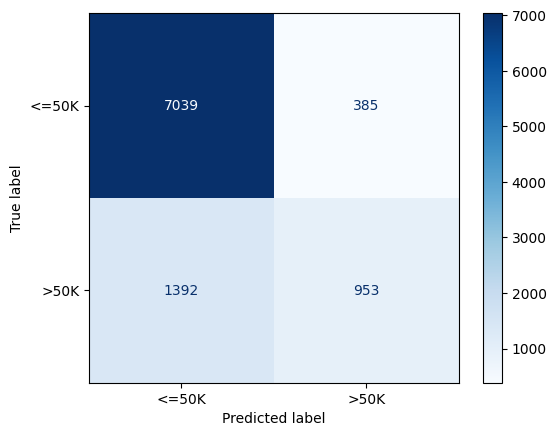

In [166]:

ConfusionMatrixDisplay.from_predictions(y_test, y_hat_lr, cmap=plt.cm.Blues)
plt.show()

In [167]:
from sklearn.preprocessing import OneHotEncoder

    # Select categorical features
categorical_features = x_train.select_dtypes(include=['object']).columns

    # Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for dense output

encoded_features_train = encoder.fit_transform(x_train[categorical_features])
encoded_features_test = encoder.transform(x_test[categorical_features])

In [168]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 37542 to 21712
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39073 non-null  int64 
 1   workclass       38300 non-null  object
 2   fnlwgt          39073 non-null  int64 
 3   education       39073 non-null  object
 4   education-num   39073 non-null  int64 
 5   marital-status  39073 non-null  object
 6   occupation      38298 non-null  object
 7   relationship    39073 non-null  object
 8   race            39073 non-null  object
 9   sex             39073 non-null  object
 10  capital-gain    39073 non-null  int64 
 11  capital-loss    39073 non-null  int64 
 12  hours-per-week  39073 non-null  int64 
 13  native-country  38860 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


In [169]:
from sklearn.preprocessing import OneHotEncoder

# Assuming x_train is your DataFrame
categorical_features = x_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(x_train[categorical_features])
encoded_df = pd.DataFrame(encoded_features)
x_train = pd.concat([x_train, encoded_df], axis=1)
x_train = x_train.drop(categorical_features, axis=1)

In [170]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46835 entries, 37542 to 39070
Columns: 111 entries, age to 104
dtypes: float64(111)
memory usage: 40.0 MB


KNN

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Separate features (x) and target variable (y)
x = data.drop('income', axis=1)
y = data['income']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply LabelEncoder to y_train and y_test
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Scale numerical features
scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(x_train_transformed)
x_test = scaler.transform(x_test_transformed)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train_transformed, y_train)

# Make predictions
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7098986590234415


Deep Learning

In [172]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score


# Separate features (x) and target variable (y)
x = data.drop('income', axis=1)
y = data['income']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply LabelEncoder to y_train and y_test
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# One-Hot Encoding for categorical features
categorical_features = x_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features_train = encoder.fit_transform(x_train[categorical_features])
encoded_features_test = encoder.transform(x_test[categorical_features])

# Create DataFrames from encoded features
encoded_df_train = pd.DataFrame(encoded_features_train)
encoded_df_test = pd.DataFrame(encoded_features_test)

# Concatenate and drop original columns
x_train = pd.concat([x_train, encoded_df_train], axis=1)
x_train.drop(categorical_features, axis=1, inplace=True)
x_test = pd.concat([x_test, encoded_df_test], axis=1)
x_test.drop(categorical_features, axis=1, inplace=True)

# Convert all data to float32
x_train = x_train_transformed.astype('float32')
x_test = x_test_transformed.astype('float32')

# --- Deep Learning Model ---
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train_transformed.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_transformed, y_train, epochs=10)

loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7490 - loss: 0.5685
Epoch 2/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7668 - loss: 0.5455
Epoch 3/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7623 - loss: 0.5497
Epoch 4/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7591 - loss: 0.5530
Epoch 5/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7592 - loss: 0.5529
Epoch 6/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7597 - loss: 0.5522
Epoch 7/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7627 - loss: 0.5480
Epoch 8/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7617 - loss: 0.5492
Epoch 9/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7576 - loss: 0.5542
Epoch 10/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7598 - loss: 0.5515
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7648 - loss: 0.5464
Test accuracy: 0.7589313387870789


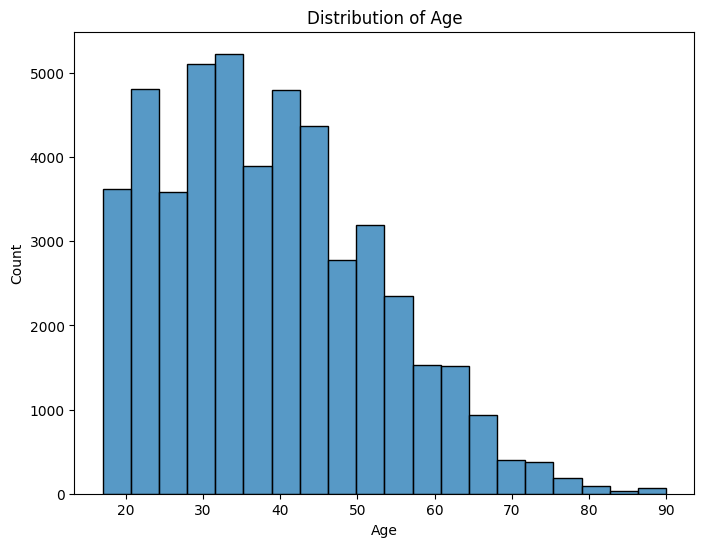

In [173]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

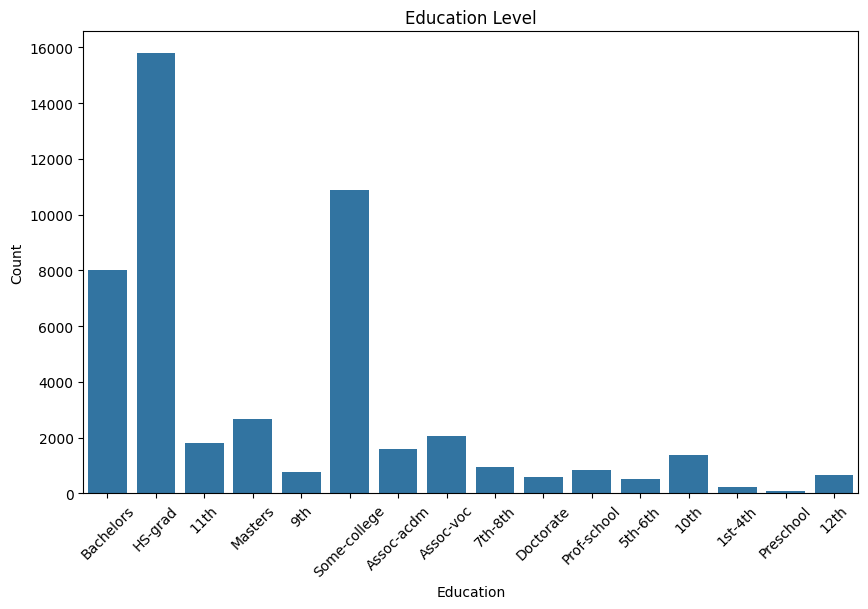

In [174]:
# Bar plot of Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=data)
plt.title('Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


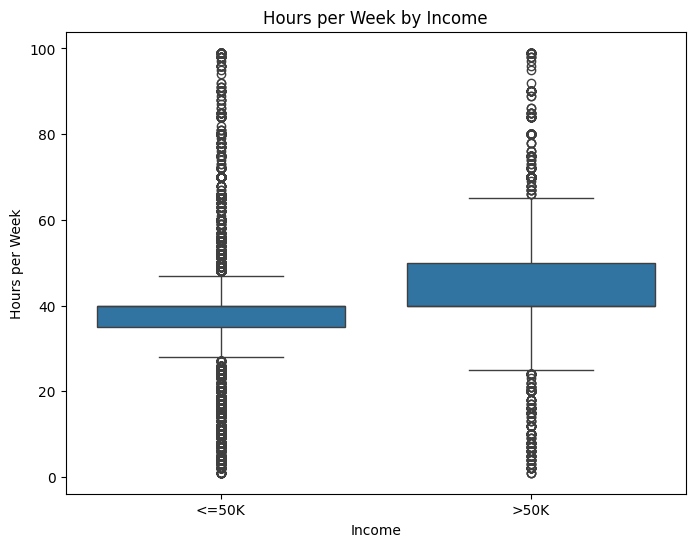

In [175]:
# Box plot of Hours per Week by Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

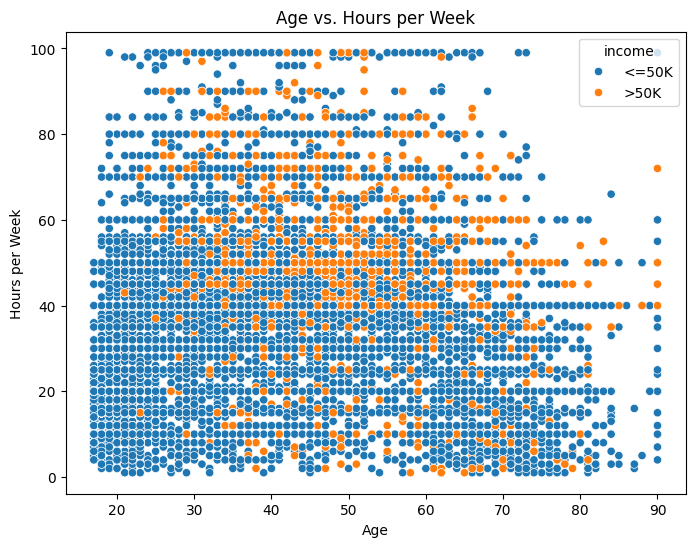

In [176]:
# Scatter plot of Age vs. Hours per Week
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours-per-week', data=data, hue='income')
plt.title('Age vs. Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

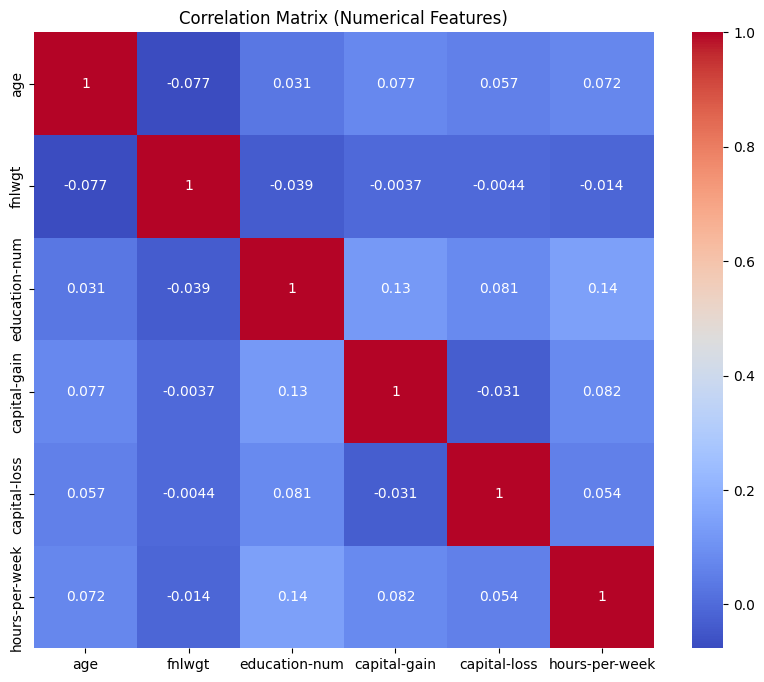

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


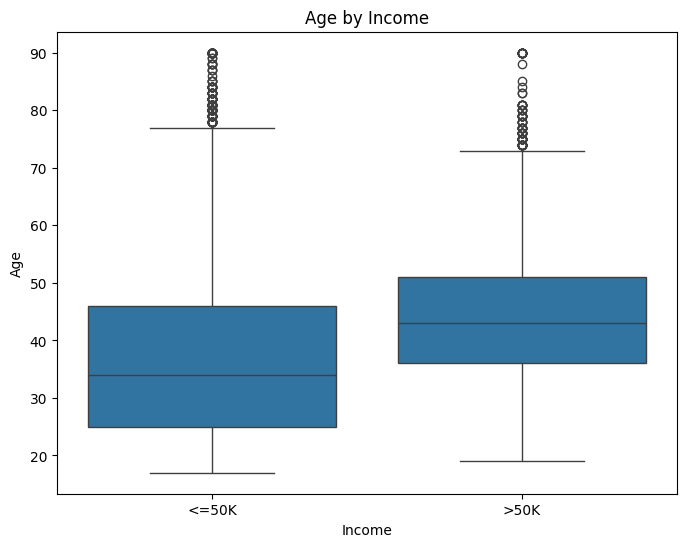

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


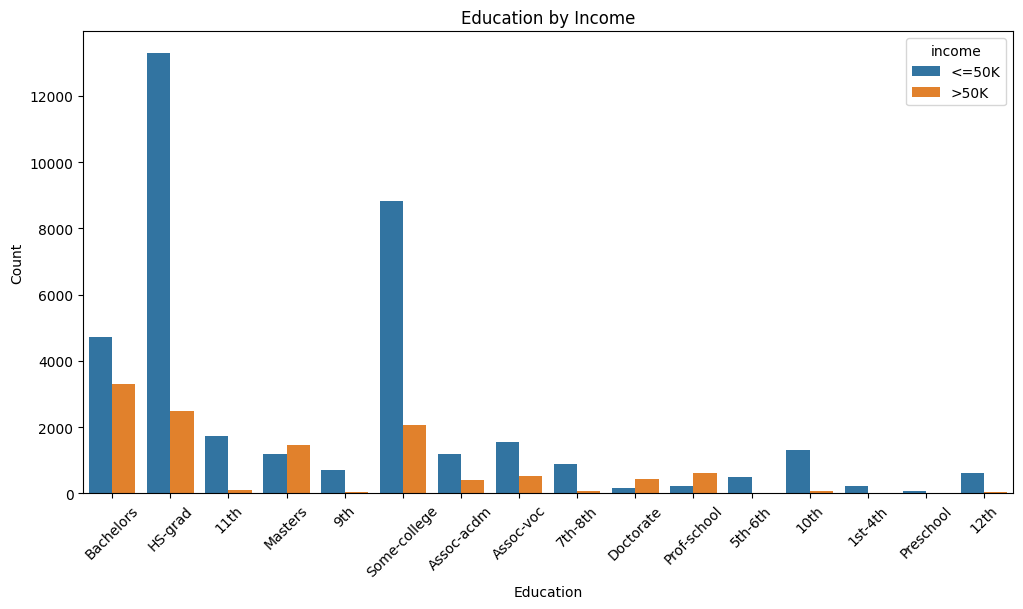

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of Age by Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

# Count plot of Education by Income
plt.figure(figsize=(12, 6))
sns.countplot(x='education', data=data, hue='income')
plt.title('Education by Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()